In [1]:
#forecast temperature using sarimax

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('Temp_Data.csv', index_col = 'DATE', parse_dates = True)

In [8]:
df.index.freq = 'D'
df.dropna(inplace = True)

In [9]:
df.head()

,Temp,relative_humidity,wind_speed,Pressure
DATE,,,,
2020-01-01,-0.44,86.0,18.5,100.15
2020-01-02,-0.09,79.0,14.0,100.47
2020-01-03,2.95,82.0,12.0,100.64
2020-01-04,-0.80,86.0,15.0,100.75
2020-01-05,-7.95,74.5,15.0,101.06


<AxesSubplot:>

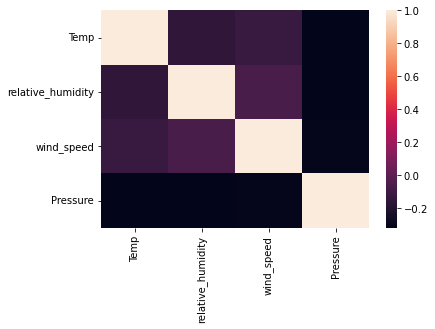

In [13]:
import seaborn as sn
sn.heatmap(df.corr())

In [11]:
#sometimes exognoeous varialbes increse computational time and hence it is more costy
train  = df.iloc[:510,0]
test = df.iloc[510:,0]

In [12]:
exo = df.iloc[:,1:4]
exo_train = exo.iloc[:510]
exo_test = exo.iloc[510:]

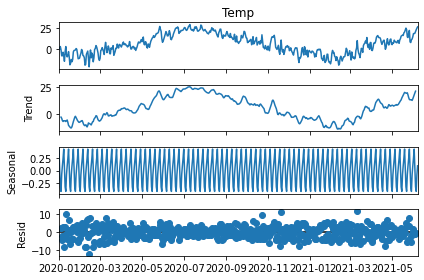

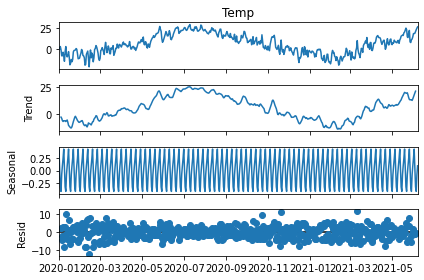

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

Decomp_results = seasonal_decompose(df['Temp'])

Decomp_results.plot()

In [15]:
from pmdarima import auto_arima

auto_arima(df['Temp'], exogenous = exo, m = 7, trace = True, D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=3496.256, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=3019.995, Time=0.20 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=3035.173, Time=0.08 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=3495.332, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=3188.466, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=2962.667, Time=0.19 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=3320.661, Time=0.21 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=2954.772, Time=0.22 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=3003.837, Time=0.09 sec
 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=2925.714, Time=0.31 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=2923.819, Time=0.12 sec
 ARIMA(2,0,0)(0,1,1)[7] intercept   : AIC=inf, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  524
Model:             SARIMAX(2, 0, 1)x(1, 1, 1, 7)   Log Likelihood               -1447.346
Date:                           Sat, 22 Jun 2024   AIC                           2906.692
Time:                                   19:55:06   BIC                           2932.180
Sample:                               01-01-2020   HQIC                          2916.679
                                    - 06-07-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3000      0.128      2.336      0.019       0.048       0.552
ar.L2          0.4309      0.117      3.672      0.000       0.201       0.661
ma.L1          0.7082      0.112      6.348      0.000       0.490       0.927
ar.S.L7       -0.1025      0.054     -1.890      0.059      -0.209       0.004
ma.S.L7       -0.7775      0.040    -19.484      0.000      -0.856      -0.699
sigma2        15.5611      0.949     16.390      0.000      13.700      17.422
===================================================================================
Ljung-Box (L1) (Q):                   1.08   Jarque-Bera (JB):                12.11
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.33
Prob(H) (two-sided):                  0.94   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

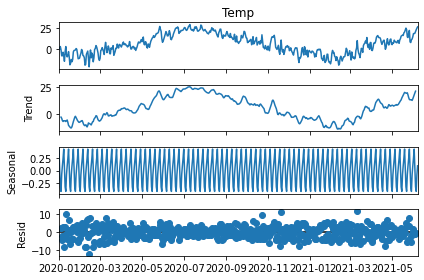

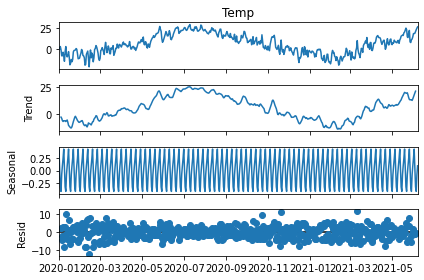

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

Decomp_results = seasonal_decompose(df['Temp'])

Decomp_results.plot()

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

Model = SARIMAX(train, exog = exo_train, order = (2,0,2), seasonal_order = (0,1,1,7) )

Model = Model.fit()

/home/mayank/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/mayank/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.21519D+00    |proj g|=  1.34707D+00

At iterate    5    f=  2.65425D+00    |proj g|=  7.97483D-02

At iterate   10    f=  2.57400D+00    |proj g|=  1.73569D-02

At iterate   15    f=  2.56812D+00    |proj g|=  8.37894D-03

At iterate   20    f=  2.56623D+00    |proj g|=  3.18151D-03

At iterate   25    f=  2.56151D+00    |proj g|=  1.20302D-01

At iterate   30    f=  2.55062D+00    |proj g|=  7.51417D-02

At iterate   35    f=  2.53837D+00    |proj g|=  7.93836D-02

At iterate   40    f=  2.53685D+00    |proj g|=  4.56149D-02

At iterate   45    f=  2.53523D+00    |proj g|=  3.56019D-02

At iterate   50    f=  2.53471D+00    |proj g|=  3.39137D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/mayank/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


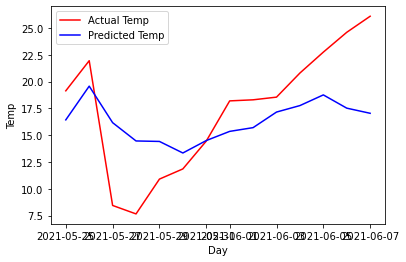

In [21]:
plt.plot(test, color = 'red', label = 'Actual Temp')
plt.plot(prediction, color = 'blue', label = 'Predicted Temp')
plt.xlabel('Day')
plt.ylabel('Temp')
plt.legend()
plt.show()

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test,prediction))
